# Changing Model Thresholds with SVC
- Thresholds are possible for parametric classifiers
    - LogisticRegression
    - LogisticRegressionCV
    - SGDClassifier
    - SVC
    - Dicriminant Analysis
    - Neural Network
- I am going to use SVC() in comparing how the balancing effects the outcomes

In [15]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from evaluator import model_evaluate

In [2]:
# Loading data
# file_path = Path("../data/myopia.csv")
file_path = Path("../eda/reduced_filtered_df.csv")
df = pd.read_csv(file_path)
df.head(1)

<IPython.core.display.Javascript object>

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen,MYOPIC
0,3.702,3.392,15.29,4,1,1.358,8,0


In [3]:
# Check dataset balance
df["MYOPIC"].value_counts()

0    323
1     49
Name: MYOPIC, dtype: int64

In [5]:
# Define X,y
label = df["MYOPIC"]
X = df.iloc[:,:-1].copy()

In [29]:
# Note the use of strategy since the dataset is imbalanced. 
# I am isolaating the X_test and y_test from the preprossing 
X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=42, test_size=0.1, stratify=label)

<IPython.core.display.Javascript object>

## No Balancing - baseline model

--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.000
Mean recall: 0.000
Mean precision: 0.000
Mean ROC AUC: 0.805


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29

C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

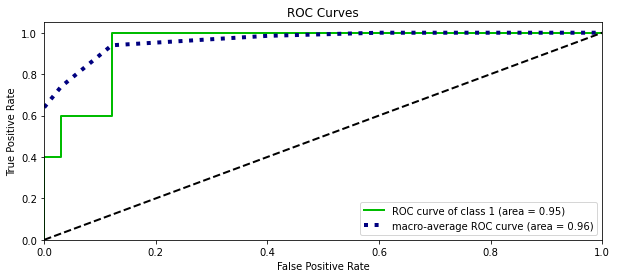



Precision-Recall Curve AUC:  0.74



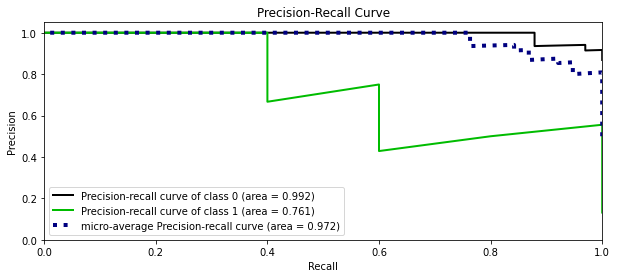

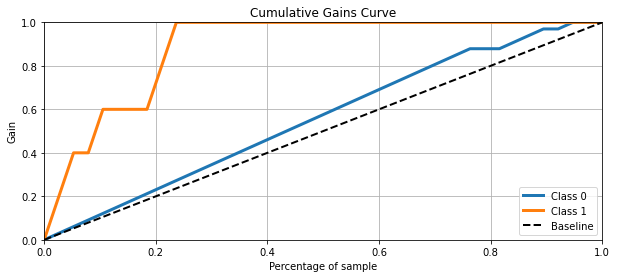

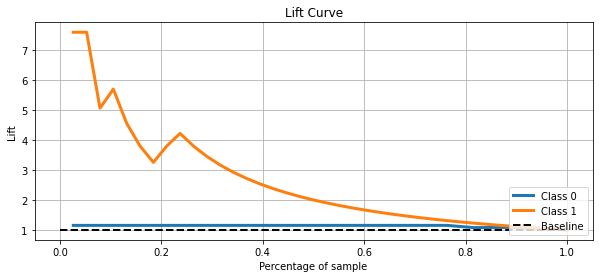



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
      0.03        0.0        0.0
     0.041        0.2        0.0
     0.042        0.4        0.0
     0.051        0.4       0.03
     0.051        0.6       0.03
     0.052        0.6       0.12
      0.06        1.0       0.12
     0.061        1.0        1.0




In [36]:
scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('model', SVC(probability=True, random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

model_evaluate(steps, cv, X_train, y_train, X_test, y_test)

## Balancing Data - RandomOverSampler

In [30]:
# Compared to the raw data scatter, the below scatter plot shows the datapoints just duplicated and plotted on top
# Note that the raw data scatter has no transparency while all the other charts below have alpha=0.2
# This was done so the effects of duplicated datapoints could be identified
# In theory, only the minority class is being duplicated but this could cause some overfitting.  

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({0: 290, 1: 290})
--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.287
Mean recall: 0.600
Mean precision: 0.191
Mean ROC AUC: 0.672


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 

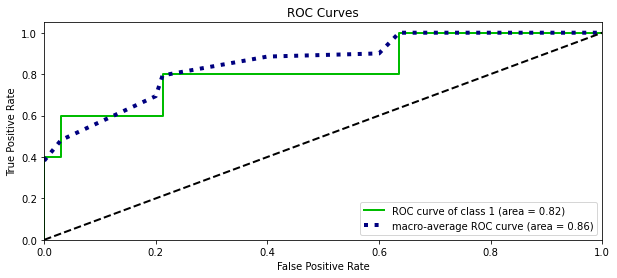



Precision-Recall Curve AUC:  0.64



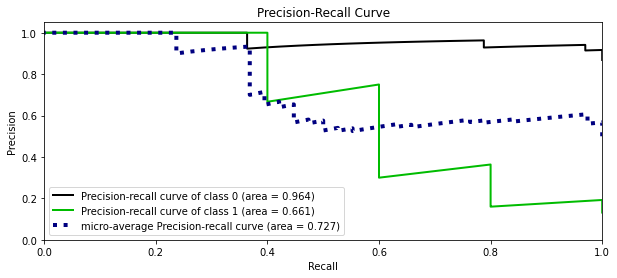

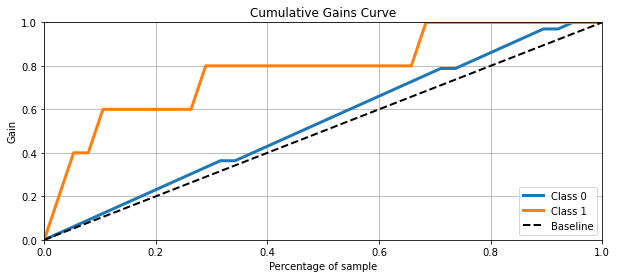

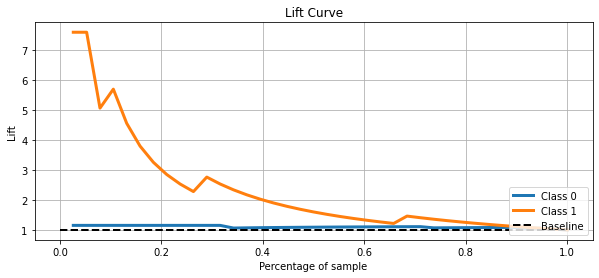



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
     0.101        0.0        0.0
     0.102        0.2        0.0
     0.126        0.4        0.0
     0.141        0.4       0.03
     0.154        0.6       0.03
     0.165        0.6       0.21
      0.19        0.8       0.21
     0.231        0.8       0.64
     0.232        1.0       0.64
     0.236        1.0        1.0




In [31]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('over', ros), ('model', SVC(probability=True, random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

model_evaluate(steps, cv, X_train, y_train, X_test, y_test)

## Analysis
- ROC Curve - Looks like the best threshold to use is 0.367 because the True Positive Rate is 0.8 and the False Positive Rate is 0.12.  In cases where the False Positive rate needs to be lower then this model would not work well since the model efficacy drops off considerably after a threshold of 0.367. 
 - Replacing the X axis might be better on the ROC Curve so that the X uses precision.  This is a better metric to use for evaluating imbalanced data where you want to choose the most accurate threshold for predicting a high ratio of minority class outcomes correctly.    


## Balancing Data - SMOTE
- synthetic minority over-sampling technique

In [10]:
# Compared to the raw data scatter, the data is spread but very close to the existing datapoints
# Theoretically, there should be more points between the existing points such that `almost narrow paths` are created between the original samples


Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({0: 290, 1: 290})
--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.292
Mean recall: 0.578
Mean precision: 0.200
Mean ROC AUC: 0.662


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 

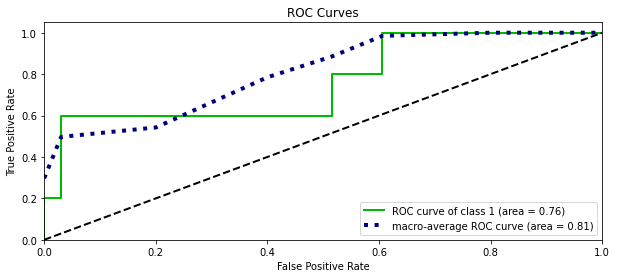



Precision-Recall Curve AUC:  0.53



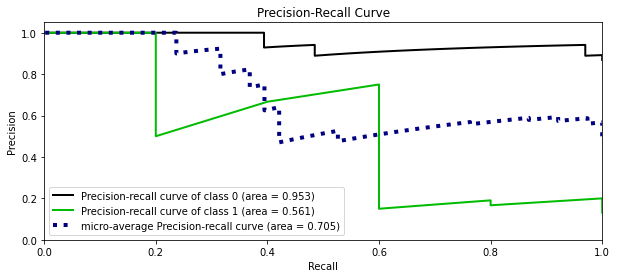

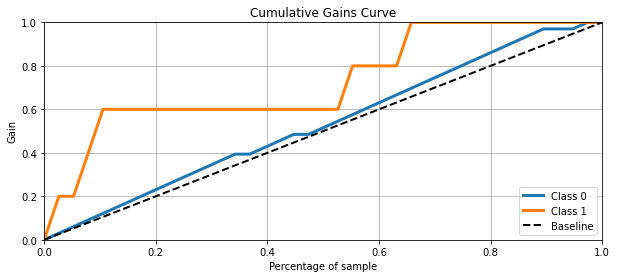

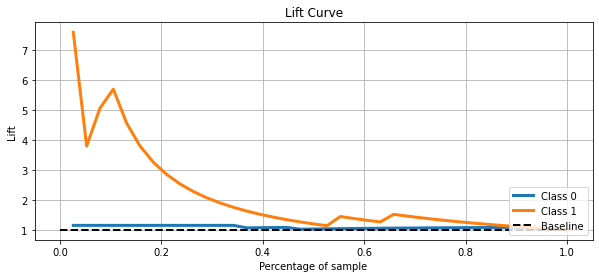



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
     0.074        0.0        0.0
     0.076        0.2        0.0
     0.086        0.2       0.03
     0.086        0.6       0.03
     0.091        0.6       0.52
     0.108        0.8       0.52
     0.146        0.8       0.61
     0.176        1.0       0.61
     0.245        1.0        1.0




In [32]:
oversample = SMOTE(random_state=42)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('over', SMOTE(random_state=42)), ('model', SVC(probability=True, random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_evaluate(steps, cv, X_train, y_train, X_test, y_test)

## Balacing Data - SMOTE with Undersampling

In [12]:
# Compared to the raw data scatter, the below scatter plot shows the datapoints scattered but there still exists an imbalance
# The dataset is smaller since the minority class was increasted and the majority class descreased in samples
# The distributions have some signficant differences
# In theory, the new samples will not follow a narrow path but a broad path giving it an appearance of randomness. 
# the new samples can also veer toward other paths if the paths become close to each other.  This can cause changes in the distributions.  
# This is probably a good method if the dataset is large and highly imbalanced initially.  

print('Original dataset shape', Counter(y_train))
print('Minority fraction of entire dataset:  ', Counter(y_train)[1]/(Counter(y_train)[0]+Counter(y_train)[1]))

Original dataset shape Counter({0: 290, 1: 44})
Minority fraction of entire dataset:   0.1317365269461078


In [25]:
# sampling_strategy 
# - total number of samples increases
# - minority class changes from 30 to 84 and majority remains at 210.
# - Math:  sampling_strategy_input=(30+x)/210=0.4 then minority_samples=30+x

# To make it easier, lets enter how much of the overall datast you want the minority class to be
minority_fraction_minority_insert = 0.2
over_sampling_strategy = minority_fraction_minority_insert/(1-minority_fraction_minority_insert)

# create oversampling of minority class plan
over = SMOTE(sampling_strategy=over_sampling_strategy, random_state=42)

# sampling_strategy 
# - total number of samples decreases
# - minority class remains at 84 but the majority class decreases from 210 to 168.
# - Math:  84/(210-x)=0.5 then majority_samples=210-x

# To make it easier,, lets enter how much of the overall dataset you want the minority class to be
minority_fraction_majority_remove = 0.3
under_sampling_strategy = (1/minority_fraction_majority_remove - 1)**-1

under = RandomUnderSampler(sampling_strategy=under_sampling_strategy, random_state=42)

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({0: 168, 1: 72})
--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.000
Mean recall: 0.000
Mean precision: 0.000
Mean ROC AUC: 0.751


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0

C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

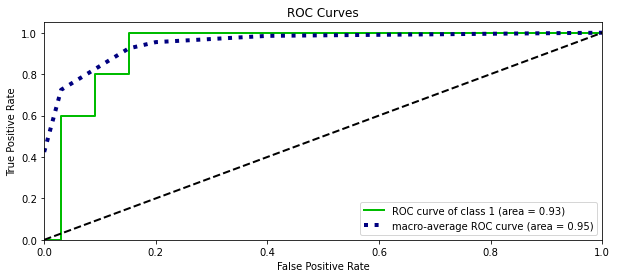



Precision-Recall Curve AUC:  0.51



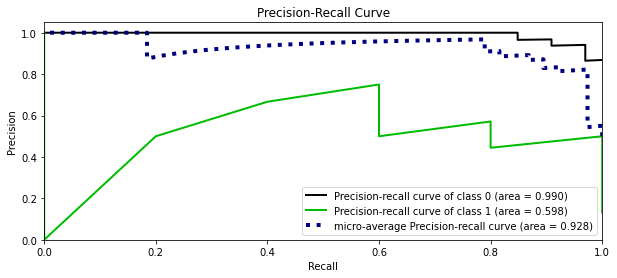

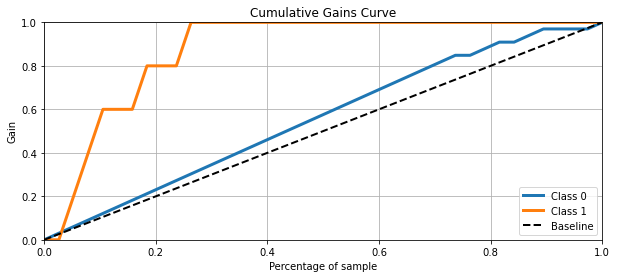

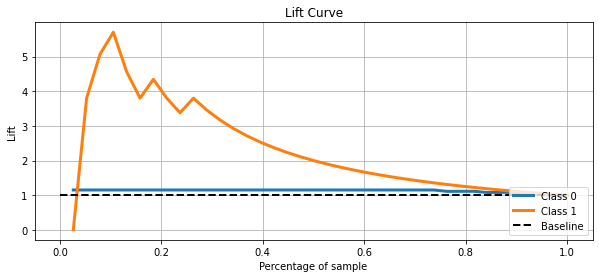



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
     0.013        0.0        0.0
     0.016        0.0       0.03
     0.018        0.6       0.03
     0.028        0.6       0.09
     0.031        0.8       0.09
     0.038        0.8       0.15
     0.039        1.0       0.15
     0.049        1.0        1.0




In [33]:
x_over, y_over = over.fit_resample(X_train, y_train)
X_under_smote, y_under_smote = under.fit_resample(x_over, y_over)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_under_smote))

steps = [('over', over), ('under', under), ('model', SVC(probability=True, random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_evaluate(steps, cv, X_train, y_train, X_test, y_test)


## Balancing Data - Sampling Low Density Areas
- Adaptive Synthetic Sampling

In [27]:
# Compared to the raw data scatter, the below scatter plot shows the datapoints spread but similar to the SMOTE method
# In theory, it adds samples to the low density areas and does not change the high density areas

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({1: 298, 0: 290})
--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.279
Mean recall: 0.597
Mean precision: 0.185
Mean ROC AUC: 0.659


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 

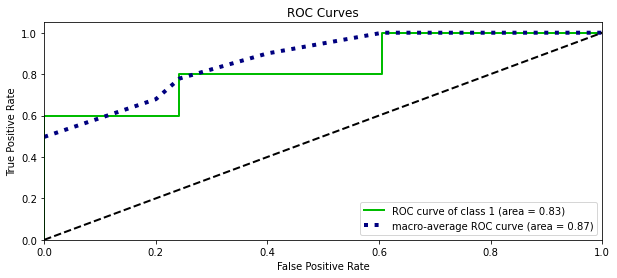



Precision-Recall Curve AUC:  0.7



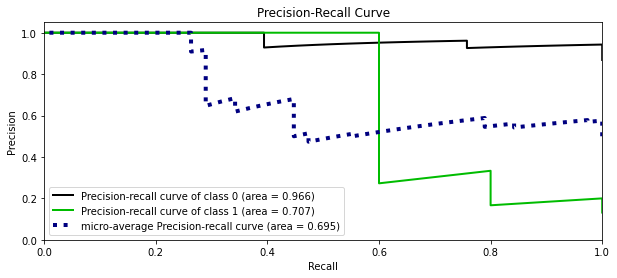

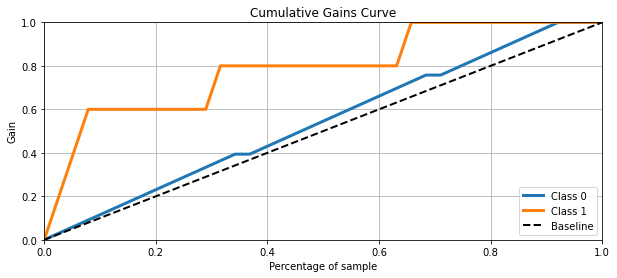

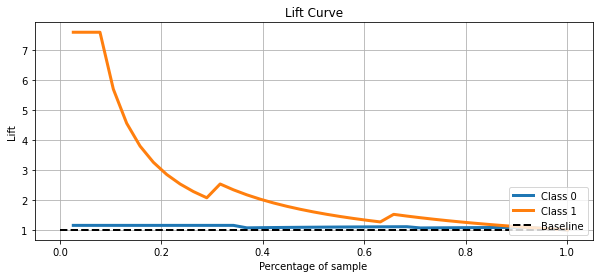



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
     0.132        0.0        0.0
     0.135        0.2        0.0
     0.144        0.6        0.0
     0.155        0.6       0.24
     0.174        0.8       0.24
     0.202        0.8       0.61
     0.231        1.0       0.61
      0.26        1.0        1.0




In [34]:
oversample = ADASYN(random_state=42)
X_low_density, y_low_density = oversample.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_low_density))

scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('over', ADASYN(random_state=42)), ('model', SVC(probability=True, random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

model_evaluate(steps, cv, X_train, y_train, X_test, y_test)


## Balancing Data - Oversampling Misclassified

In [ ]:
# Compared to the raw data scatter, the below scatter plot shows the datapoints spread but less drastically
# Often used to identify hard to classify datapoints.  The models that work well are KNN and SVM
# In theory, samples are added from the misclassified minority class as identified by KNN.  New samples are added along the 
# decision border but not within a boundary of majority class samples.  This prevents paths from forming to outliers.
# Note:  There is also a SVMSMOTE() which uses SVC to find the misclassified.

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({0: 290, 1: 290})
--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.270
Mean recall: 0.547
Mean precision: 0.183
Mean ROC AUC: 0.638


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 

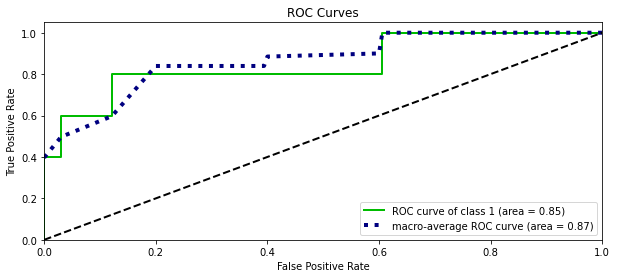



Precision-Recall Curve AUC:  0.67



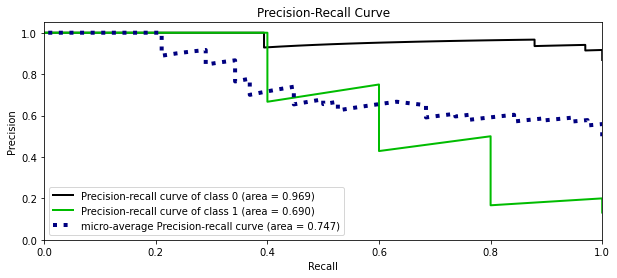

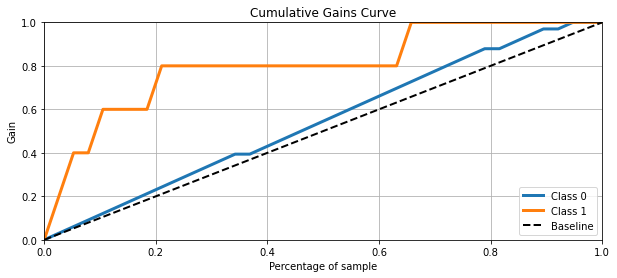

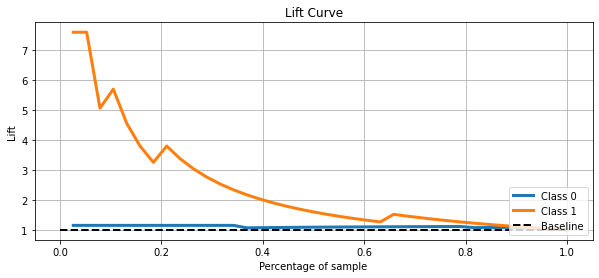



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
     0.073        0.0        0.0
     0.073        0.2        0.0
     0.076        0.4        0.0
     0.085        0.4       0.03
      0.13        0.6       0.03
     0.144        0.6       0.12
     0.169        0.8       0.12
     0.188        0.8       0.33
     0.204        0.8       0.39
     0.214        0.8       0.61
     0.273        1.0       0.61
     0.298        1.0        1.0




In [35]:
oversample = BorderlineSMOTE(random_state=42)
X_over_misc, y_over_misc = oversample.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_over_misc))

scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('over', BorderlineSMOTE(random_state=42)), ('model', SVC(probability=True, random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_evaluate(steps, cv, X_train, y_train, X_test, y_test)